<h4>Importing Libraries</h4>

In [241]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [35]:
df = pd.read_csv("List of Countries by Sugarcane Production.csv")


In [36]:
df.shape

(103, 7)

In [37]:
df.head()

,Unnamed: 0,Country,Continent,Production (Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare)
0,0,Brazil,South America,768.678.382,"3.668,531",10.226.205,"75.167,5"
1,1,India,Asia,348.448.000,260721,4.950.000,"70.393,5"
2,2,China,Asia,123.059.739,88287,1.675.215,"73.459,1"
3,3,Thailand,Asia,87.468.496,"1.264,303",1.336.575,"65.442,2"
4,4,Pakistan,Asia,65.450.704,324219,1.130.820,57.879


<h5>Data Cleaning</h5>

In [39]:
df["Production (Tons)"] = df["Production (Tons)"].str.replace(".","")
df["Production per Person (Kg)"] = df["Production per Person (Kg)"].str.replace(".","").str.replace(",",".")
df["Acreage (Hectare)"] = df["Acreage (Hectare)"].str.replace(".","")
df["Yield (Kg / Hectare)"]= df["Yield (Kg / Hectare)"].str.replace(".","").str.replace(",",".")

In [40]:
df.head()

,Unnamed: 0,Country,Continent,Production (Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare)
0,0,Brazil,South America,768678382,3668.531,10226205,75167.5
1,1,India,Asia,348448000,260721,4950000,70393.5
2,2,China,Asia,123059739,88287,1675215,73459.1
3,3,Thailand,Asia,87468496,1264.303,1336575,65442.2
4,4,Pakistan,Asia,65450704,324219,1130820,57879


In [41]:
df = df.drop( "Unnamed: 0", axis = 1)

In [42]:
df.rename(columns= {"Production (Tons)": "Production(Tons)"}, inplace = True)
df.rename(columns= {"Production per Person (Kg)": "Production_per_person(Kg)"}, inplace = True)
df.rename(columns= {"Acreage (Hectare)": "Acreage(Hectare)"}, inplace = True)
df.rename(columns= {"Yield (Kg / Hectare)": "Yield(Kg/Hectare)"}, inplace = True)

In [43]:
df.head()

,Country,Continent,Production(Tons),Production_per_person(Kg),Acreage(Hectare),Yield(Kg/Hectare)
0,Brazil,South America,768678382,3668.531,10226205,75167.5
1,India,Asia,348448000,260721,4950000,70393.5
2,China,Asia,123059739,88287,1675215,73459.1
3,Thailand,Asia,87468496,1264.303,1336575,65442.2
4,Pakistan,Asia,65450704,324219,1130820,57879


In [44]:
df.isna().sum()

Country                      0
Continent                    0
Production(Tons)             0
Production_per_person(Kg)    0
Acreage(Hectare)             1
Yield(Kg/Hectare)            1
dtype: int64

In [45]:
df[df['Acreage(Hectare)'].isna() ]

,Country,Continent,Production(Tons),Production_per_person(Kg),Acreage(Hectare),Yield(Kg/Hectare)
99,Djibouti,Africa,53,51,NaN,NaN


In [46]:
df.dropna(inplace =True)


In [47]:
df.head(5)

,Country,Continent,Production(Tons),Production_per_person(Kg),Acreage(Hectare),Yield(Kg/Hectare)
0,Brazil,South America,768678382,3668.531,10226205,75167.5
1,India,Asia,348448000,260721,4950000,70393.5
2,China,Asia,123059739,88287,1675215,73459.1
3,Thailand,Asia,87468496,1264.303,1336575,65442.2
4,Pakistan,Asia,65450704,324219,1130820,57879


In [48]:
df.reset_index(drop=True, inplace=True)

In [49]:
df.nunique()

Country                      102
Continent                      6
Production(Tons)             102
Production_per_person(Kg)    101
Acreage(Hectare)             101
Yield(Kg/Hectare)            102
dtype: int64

In [511]:
def find_country(df):
    ls =[]
    for i in df['Country']:
        ls.append(i)
    return ls
print(find_country())

['Brazil', 'India', 'China', 'Thailand', 'Pakistan', 'Mexico', 'Colombia', 'Australia', 'Guatemala', 'United States of America', 'Indonesia', 'Philippines', 'Argentina', 'Cuba', 'Vietnam', 'Egypt', 'South Africa', 'Myanmar', 'Peru', 'Ecuador', 'Iran', 'El Salvador', 'Kenya', 'Bolivia', 'Nicaragua', 'Paraguay', 'Swaziland', 'Sudan', 'Honduras', 'Dominican Republic', 'Nepal', 'Zambia', 'Bangladesh', 'Costa Rica', 'Mauritius', 'Uganda', 'Zimbabwe', 'Venezuela', 'Madagascar', 'Tanzania', 'Malawi', 'Mozambique', 'Panama', 'Guyana', 'Congo-Kinshasa', 'Laos', "Côte d'Ivoire", 'Japan', 'Fiji', 'Haiti', 'Belize', 'Jamaica', 'Ethiopia', 'Nigeria', 'Cameroon', 'Trinidad and Tobago', 'Sri Lanka', 'Senegal', 'Congo-Brazzaville', 'Cambodia', 'Angola', 'Burkina Faso', 'Chad', 'Morocco', 'Taiwan', 'Uruguay', 'Mali', 'Guinea', 'Gabon', 'Liberia', 'Burundi', 'Papua New Guinea', 'Niger', 'Somalia', 'Ghana', 'Suriname', 'Central African Republic', 'Saint Kitts and Nevis', 'Rwanda', 'Barbados', 'Sierra Leo

In [513]:
def find_continent(df):
    cont = []
    for i in df['Continent'].unique():
        cont.append(i)
    return cont
print(find_continent())

['South America', 'Asia', 'North America', 'Oceania', 'Africa', 'Europe']


In [527]:
def countryInContinent(df):
    
    dist ={}
    for i in cont:
        dist[i]=[]
        
    for i in range(0,102):
         country = df['Country'][i]
         continent = df['Continent'][i]
         dist[continent].append(country)
    return dist

for key in countryInContinent(df):
    print(key," : ",dist[key])
    print('-'*50)



South America  :  ['Brazil', 'Colombia', 'Argentina', 'Peru', 'Ecuador', 'Bolivia', 'Paraguay', 'Venezuela', 'Guyana', 'Uruguay', 'Suriname']
--------------------------------------------------
Asia  :  ['India', 'China', 'Thailand', 'Pakistan', 'Indonesia', 'Philippines', 'Vietnam', 'Myanmar', 'Iran', 'Nepal', 'Bangladesh', 'Laos', 'Japan', 'Sri Lanka', 'Cambodia', 'Taiwan', 'Afghanistan', 'Bhutan', 'Iraq', 'Malaysia', 'Oman', 'Yemen', 'Lebanon', 'Singapore', 'Syria']
--------------------------------------------------
North America  :  ['Mexico', 'Guatemala', 'United States of America', 'Cuba', 'El Salvador', 'Nicaragua', 'Honduras', 'Dominican Republic', 'Costa Rica', 'Panama', 'Haiti', 'Belize', 'Jamaica', 'Trinidad and Tobago', 'Saint Kitts and Nevis', 'Barbados', 'The Bahamas', 'Saint Vincent and the Grenadines', 'Saint Lucia', 'Grenada', 'Antigua and Barbuda', 'Dominica']
--------------------------------------------------
Oceania  :  ['Australia', 'Fiji', 'Papua New Guinea', 'Samo

In [531]:
def num_of_Country(df): 
    total_len = 0
    for key in dist:
        print(key," : ",len(dist[key]))
        total_len+=len(dist[key])
    print(total_len)
num_of_Country(df)

South America  :  11
Asia  :  25
North America  :  22
Oceania  :  4
Africa  :  38
Europe  :  2
102


In [54]:
df.dtypes

Country                      object
Continent                    object
Production(Tons)             object
Production_per_person(Kg)    object
Acreage(Hectare)             object
Yield(Kg/Hectare)            object
dtype: object

In [330]:
df['Production(Tons)']=df['Production(Tons)'].astype(float)
df['Production_per_person(Kg)'] = df['Production_per_person(Kg)'].astype(float)
df['Acreage(Hectare)'] = df['Acreage(Hectare)'].astype(float)
df['Yield(Kg/Hectare)'] = df['Yield(Kg/Hectare)'].astype(float)

<h1>Univariate Analysis</h1>

## How many countries produce sugarcane from each continent?

In [220]:
df['Continent'].value_counts()

Continent
Africa           38
Asia             25
North America    22
South America    11
Oceania           4
Europe            2
Name: count, dtype: int64

<Axes: xlabel='Continent'>

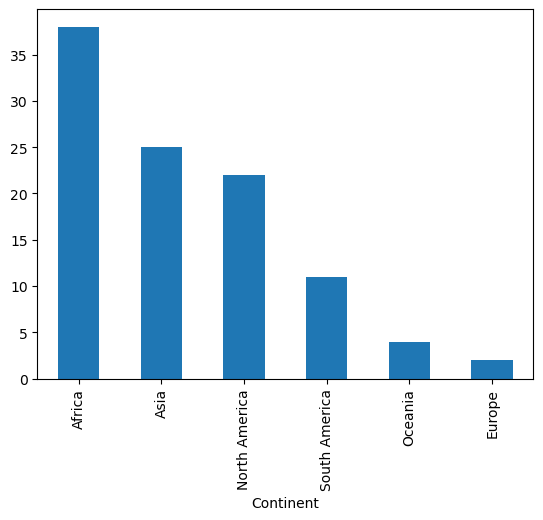

In [332]:
df['Continent'].value_counts().plot(kind ="bar")

<Axes: xlabel='Continent', ylabel='count'>

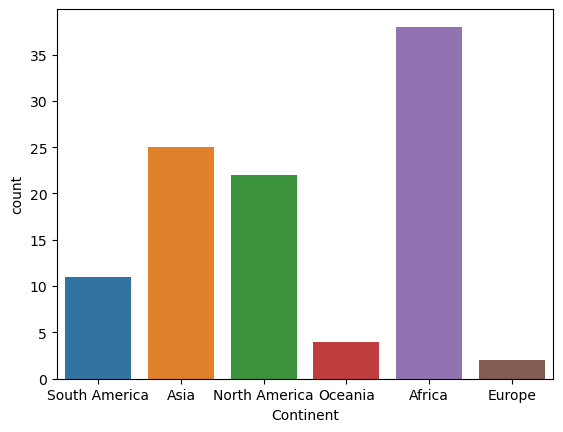

In [334]:
sns.countplot(x='Continent', data=df)

In [336]:
df.describe()

,Production(Tons),Production_per_person(Kg),Acreage(Hectare),Yield(Kg/Hectare)
count,1.020000e+02,102.000000,1.020000e+02,102.000000
mean,1.850372e+07,112952.435755,2.498981e+05,52628.078431
std,8.419149e+07,176651.341929,1.137003e+06,30504.676683
min,1.000000e+00,0.000000,0.000000e+00,10.000000
25%,6.251875e+04,3671.910000,1.104000e+03,29072.025000
50%,1.440044e+06,25572.500000,1.655800e+04,54108.950000
75%,6.426824e+06,146384.750000,8.047400e+04,73282.700000
max,7.686784e+08,951087.000000,1.022620e+07,129049.300000


<h2>Checking Outliers</h2>

Text(0.5, 1.0, 'Yield(Kg/Hectare)')

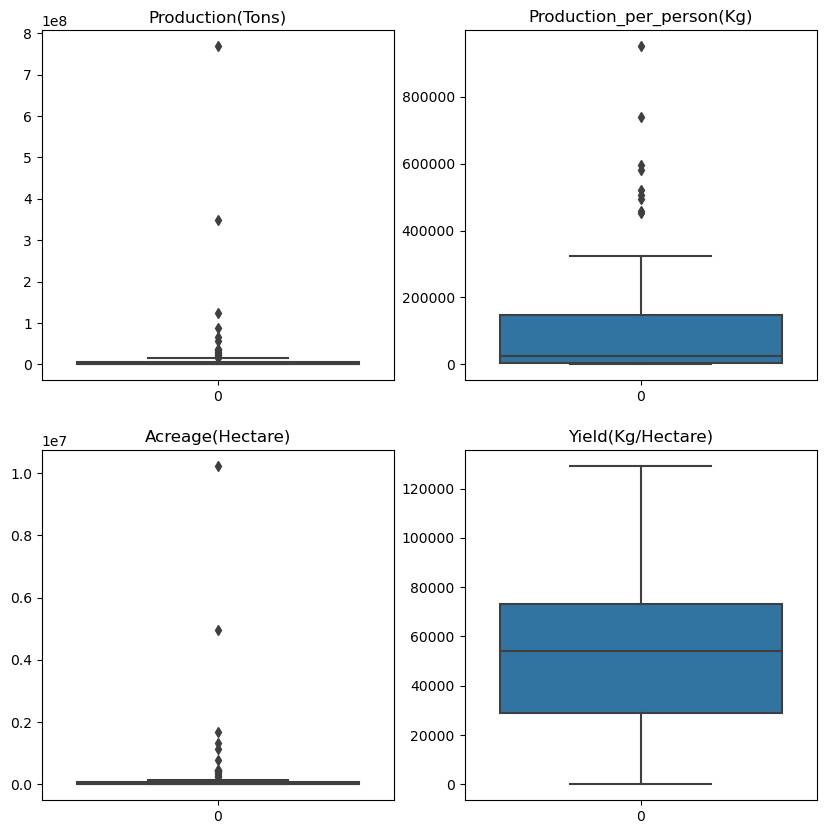

In [338]:
plt.figure(figsize = (10,10))
plt.subplot(2,2,1)
sns.boxplot(df['Production(Tons)'])
plt.title('Production(Tons)')
plt.subplot(2,2,2)
sns.boxplot(df['Production_per_person(Kg)'])
plt.title('Production_per_person(Kg)')
plt.subplot(2,2,3)
sns.boxplot(df['Acreage(Hectare)'])
plt.title('Acreage(Hectare)')
plt.subplot(2,2,4)
sns.boxplot(df['Yield(Kg/Hectare)'])
plt.title('Yield(Kg/Hectare)')

<h1>Bivariate Analysis</h1>

## Which country produces maximum sugarcane?

In [340]:
df_new = df[['Country','Production(Tons)']].set_index('Country')
df_new['Production(Tons)']=df_new['Production(Tons)'].astype(float)
df_new['Production(Tons)_percent']= df_new['Production(Tons)']*100/df_new['Production(Tons)'].sum()
df_new

,Production(Tons),Production(Tons)_percent
Country,,
Brazil,768678382.0,4.072729e+01
India,348448000.0,1.846200e+01
China,123059739.0,6.520138e+00
Thailand,87468496.0,4.634389e+00
Pakistan,65450704.0,3.467809e+00
...,...,...
Spain,394.0,2.087551e-05
Lebanon,97.0,5.139401e-06
Singapore,50.0,2.649176e-06


<Axes: ylabel='Production(Tons)_percent'>

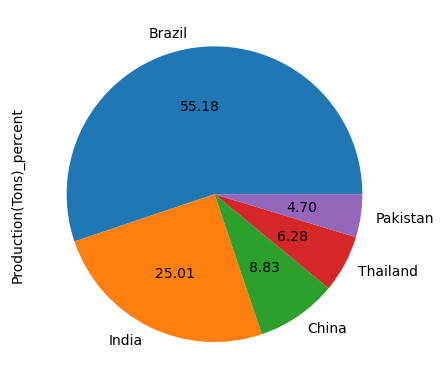

In [420]:
df_new["Production(Tons)_percent"].head(5).plot(kind = "pie", autopct = "%.2f")

<Axes: xlabel='Country'>

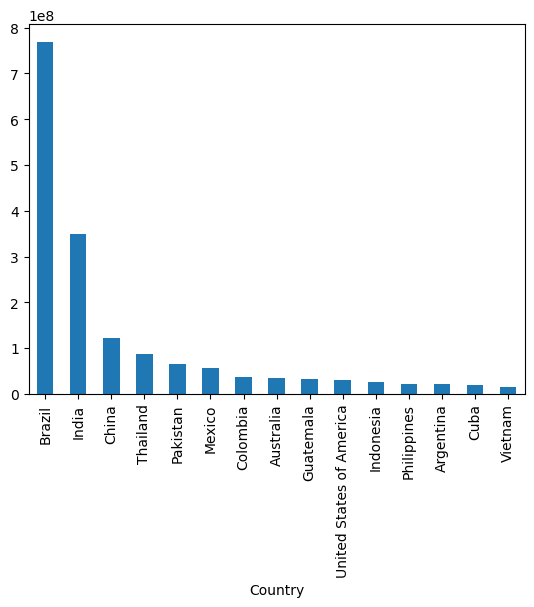

In [324]:
df_new.head(15)['Production(Tons)'].plot(kind ="bar")

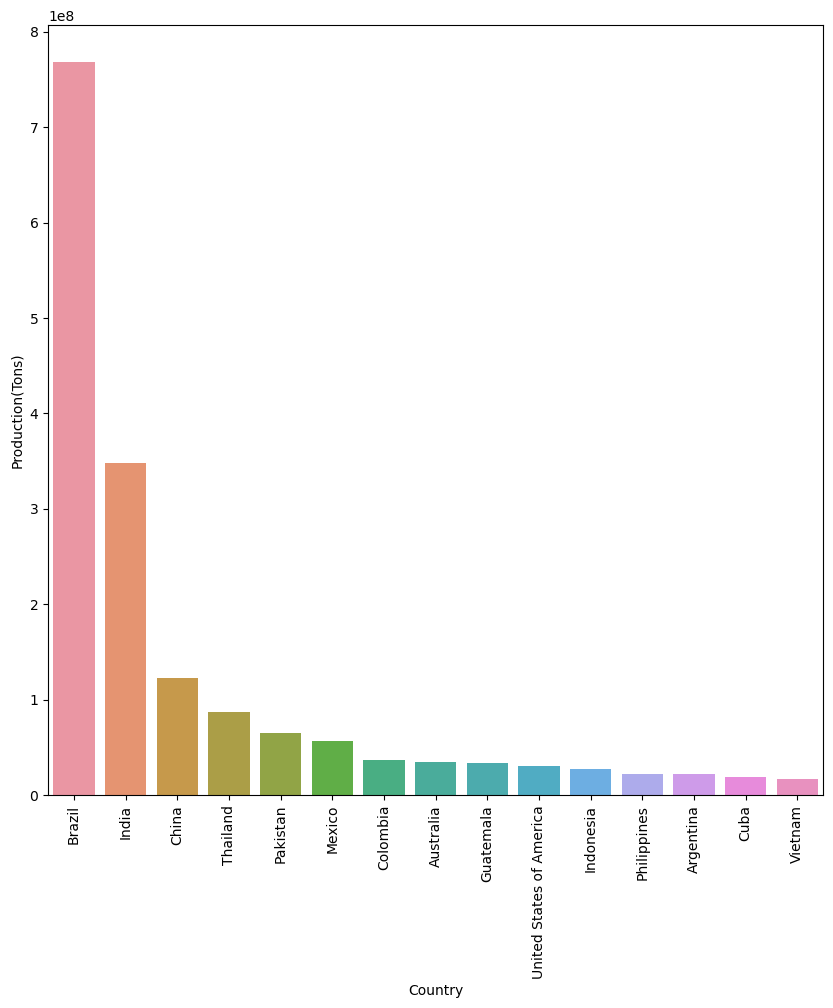

In [368]:
plt.figure(figsize=(10,10))
ax = sns.barplot(data = df.head(15),x="Country",y="Production(Tons)")
ax.set_xticklabels(ax.get_xticklabels(),rotation =90)
plt.show()

## Which country has highest land?

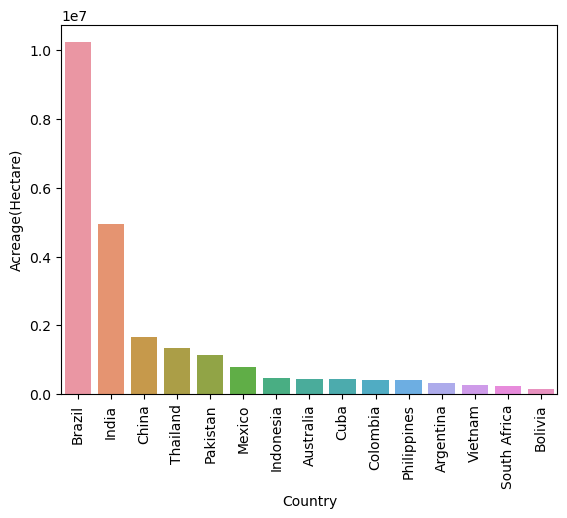

In [383]:
df_land  = df.sort_values('Acreage(Hectare)',ascending = False).head(15)
ax = sns.barplot(data = df_land, x="Country",y="Acreage(Hectare)")
ax.set_xticklabels(ax.get_xticklabels(),rotation =90)
plt.show()

## Which country has highest yield per hectare?


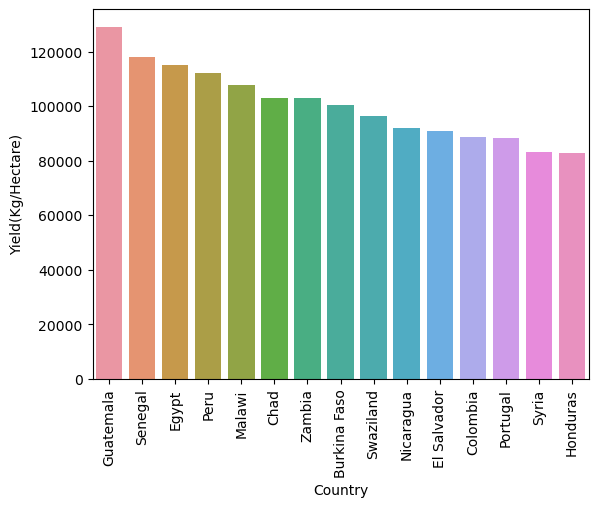

In [403]:
df_yield = df.sort_values('Yield(Kg/Hectare)',ascending = False).head(15)
ax = sns.barplot(data = df_yield,x ="Country",y="Yield(Kg/Hectare)")
ax.set_xticklabels(ax.get_xticklabels(),rotation =90)
plt.show()

## Which country has highest production? 

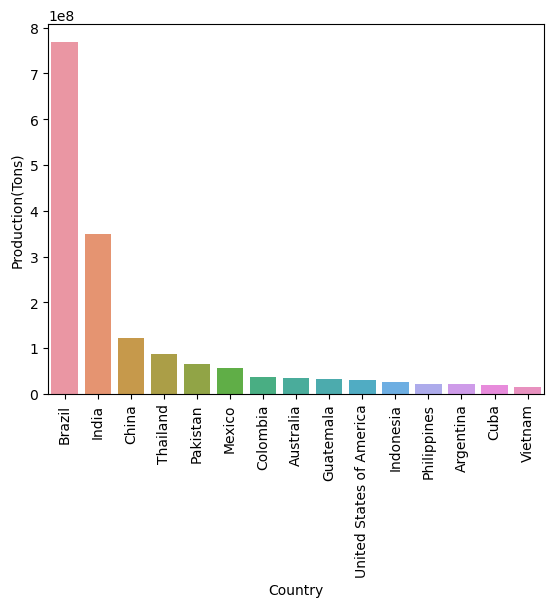

In [401]:
df_production = df.sort_values('Production(Tons)',ascending = False).head(15);
ax = sns.barplot(data = df_production,x = "Country",y="Production(Tons)")
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
plt.show()

## Correlation 

In [410]:
df.corr(numeric_only = True)

,Production(Tons),Production_per_person(Kg),Acreage(Hectare),Yield(Kg/Hectare)
Production(Tons),1.000000,0.015000,0.997550,0.132812
Production_per_person(Kg),0.015000,1.000000,0.012557,0.017999
Acreage(Hectare),0.997550,0.012557,1.000000,0.113433
Yield(Kg/Hectare),0.132812,0.017999,0.113433,1.000000


<Axes: >

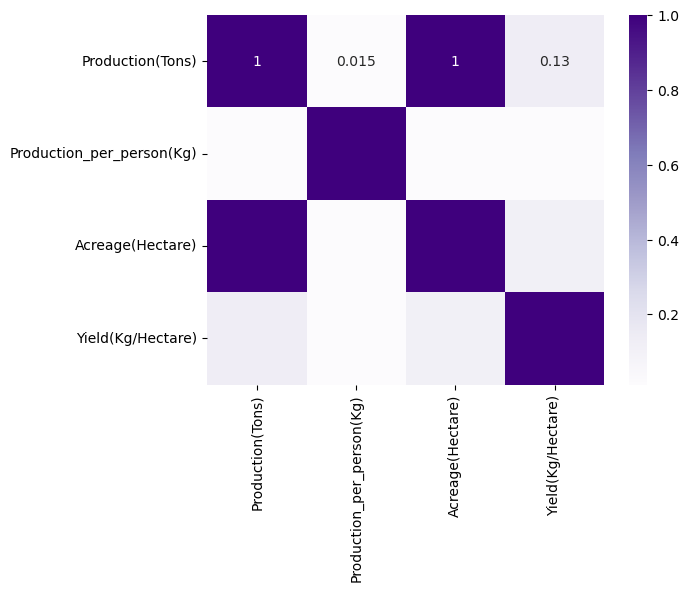

In [422]:
sns.heatmap(df.corr(numeric_only = True),annot = True,cmap ="Purples")

## Do countries with highest land produce more sugarcane? 

<Axes: xlabel='Acreage(Hectare)', ylabel='Production(Tons)'>

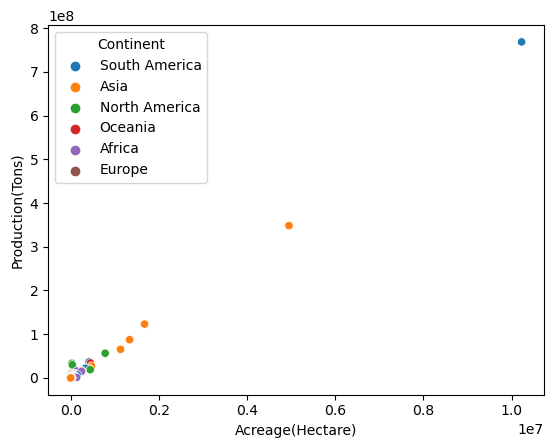

In [429]:
sns.scatterplot(data= df, x = "Acreage(Hectare)",y="Production(Tons)",hue ="Continent")

## Do countries which yield more sugarcane per hectare produces more sugarcane in total? 

<Axes: xlabel='Yield(Kg/Hectare)', ylabel='Production(Tons)'>

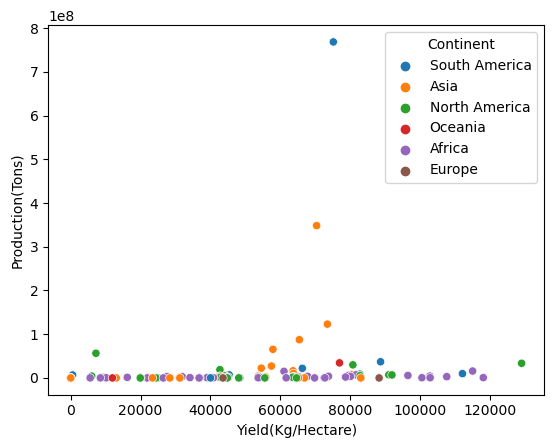

In [434]:
sns.scatterplot(data = df, x = "Yield(Kg/Hectare)",y="Production(Tons)",hue="Continent")

# Analysis for Continent

In [445]:
df_continent = df.groupby("Continent").sum()
df_continent["number_of_countries"]=df.groupby("Continent").count()["Country"]
df_continent

,Country,Production(Tons),Production_per_person(Kg),Acreage(Hectare),Yield(Kg/Hectare),number_of_countries
Continent,,,,,,
Africa,EgyptSouth AfricaKenyaSwazilandSudanZambiaMaur...,89681472.0,2332636.293,1439089.0,2142107.5,38
Asia,IndiaChinaThailandPakistanIndonesiaPhilippines...,721930425.0,1857769.303,10608319.0,1171871.4,25
Europe,PortugalSpain,5823.0,536.000,71.0,131870.9,2
North America,MexicoGuatemalaUnited States of AmericaCubaEl ...,173995947.0,3796081.508,1581983.0,1082602.4,22
Oceania,AustraliaFijiPapua New GuineaSamoa,36177574.0,28593.605,490909.0,162419.1,4
South America,BrazilColombiaArgentinaPeruEcuadorBoliviaParag...,865588126.0,3505531.738,11369236.0,677192.7,11


## Which continent produces maximum sugarcane? 

<Axes: xlabel='Continent'>

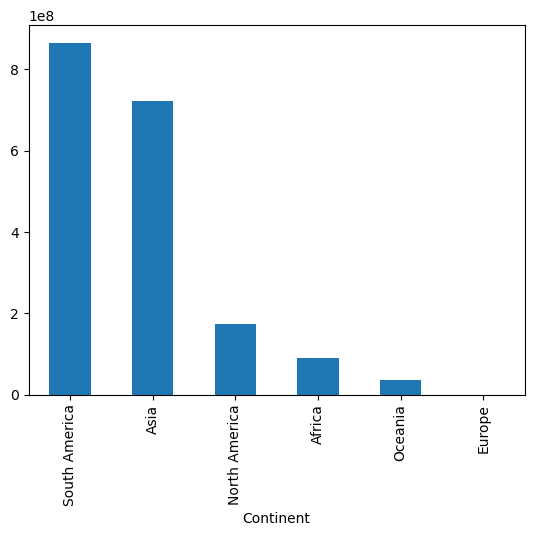

In [462]:
df_continent["Production(Tons)"].sort_values(ascending = False).plot(kind = "bar")

## Do number of countries in a Continent effects production of sugarcane?

C:\Users\Harshit\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Harshit\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


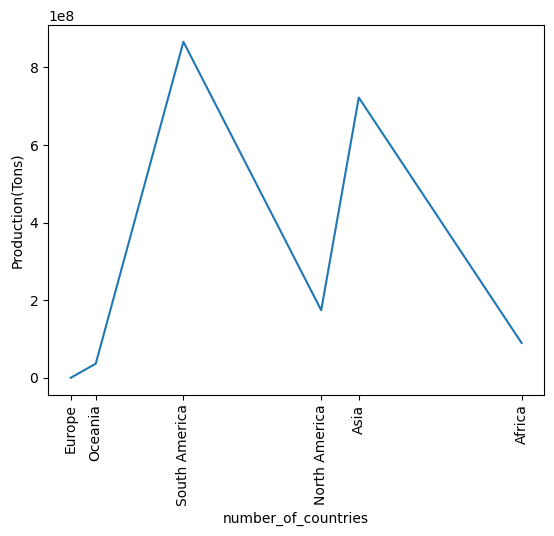

In [481]:
continent_name = df_continent.index.to_list()
sns.lineplot(data = df_continent, x = "number_of_countries",y="Production(Tons)")
plt.xticks(df_continent['number_of_countries'],continent_name,rotation = 90)
plt.show()

## Do continent with highest land produces more sugarcane?

C:\Users\Harshit\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Harshit\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Acreage(Hectare)', ylabel='Production(Tons)'>

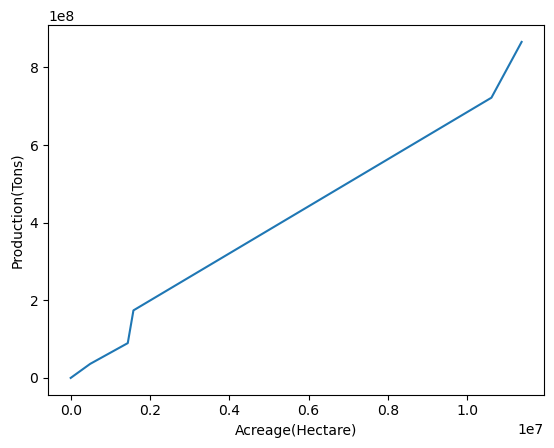

In [486]:
sns.lineplot(data = df_continent,x = "Acreage(Hectare)", y= "Production(Tons)" )

# Production Distribution By Continent

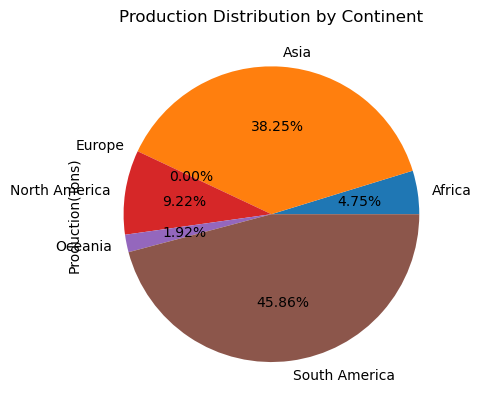

In [501]:

df_continent['Production(Tons)'].plot(kind = "pie",autopct ="%0.2f%%")
plt.title('Production Distribution by Continent')
plt.show()

In [503]:
df_continent.corr(numeric_only = True)

,Production(Tons),Production_per_person(Kg),Acreage(Hectare),Yield(Kg/Hectare),number_of_countries
Production(Tons),1.000000,0.522211,0.994897,0.091201,0.109244
Production_per_person(Kg),0.522211,1.000000,0.463215,0.542961,0.540086
Acreage(Hectare),0.994897,0.463215,1.000000,0.111166,0.132817
Yield(Kg/Hectare),0.091201,0.542961,0.111166,1.000000,0.989712
number_of_countries,0.109244,0.540086,0.132817,0.989712,1.000000


<Axes: >

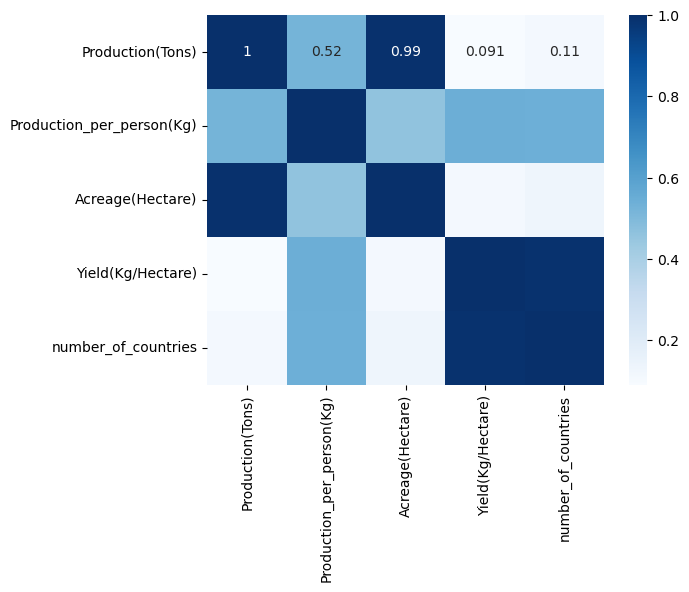

In [505]:
sns.heatmap(df_continent.corr(numeric_only = True),annot = True,cmap="Blues")